# Jane Street Real-Time Market Data Forecasting

- 赛题名称：Jane Street Real-Time Market Data Forecasting
- 赛题类型：金融量化、时间序列
- 赛题任务：利用提供的时间序列数据（包含79个特征）来预测未来最多六个月的特定的响应

> https://www.kaggle.com/competitions/jane-street-real-time-market-data-forecasting

## 赛题背景
金融市场的建模非常具有挑战性，因为它涉及到一些在其他类型的建模问题中不常见的特性。例如，金融市场的分布可能是重尾的（即极端值出现的概率高于正态分布），时间序列可能是非平稳的（即统计特性随时间变化），而且数据可能不满足许多统计方法所依赖的基本假设。此外，金融市场本质上是人类行为的体现，涉及大量个人和机构，他们随着技术进步、社会变化、经济和地缘政治问题的出现而不断变化，这进一步增加了建模的难度。

## 赛题任务
在这个挑战中，参赛者需要使用来自Jane Street生产系统的实时数据来构建模型。这些数据提供了对现代金融市场交易日常挑战的深入了解。竞赛组织者已经收集了一系列与他们运行自动化交易策略的市场相关的特征和响应器，并在数据中对一些特征和响应器进行了匿名化和轻度混淆处理，以保护公司的专有信息和竞争力。这些修改不会改变问题的本质，但确实为参赛者提供了一个有意义的挑战，展示了Jane Street的日常工作。

Jane Street在交易的各个方面进行了数十年的不懈创新，并构建了机器学习模型来辅助决策。这些模型帮助他们每天在全球200多个交易场所活跃交易数千种金融产品。虽然这个挑战只展示了Jane Street员工日常工作中的一小部分量化问题，但他们非常感兴趣地想看看Kaggle社区将如何接近这个挑战，并期待与参赛者就解决方案进行交流。

## 评价指标

在这个竞赛中，提交的模型将根据一个特定的评分函数进行评估，这个评分函数是样本加权零均值R平方分数（R2）。R2的计算公式如下：

$$ R^2 = 1 - \frac{\sum_{i} w_i (y_i - \hat{y}_i)^2}{\sum_{i} w_i y_i^2} $$

其中：
- $ y $ 是响应变量（responder_6）的真实值向量。
- $ \hat{y} $ 是预测值向量。
- $ w $ 是样本权重向量。

这个公式衡量的是模型预测值与实际值之间的相关程度。R2分数越接近1，表示模型的预测越准确；如果R2分数接近0，表示模型的预测效果不比随机猜测好多少；而负的R2分数则表示模型的预测效果比随机猜测还要差。

**在提交竞赛结果时，必须使用提供的评估API，这个API确保模型不会“窥视”未来数据，即模型不能使用未来的时间点的数据来进行预测。这样可以保证评估的公平性和模型的泛化能力。具体的提交流程和示例可以在官方提供的示例笔记本中找到更详细的说明。**



## 赛题数据分析

竞赛数据集它包含了79个特征和9个响应变量的一系列时间序列数据，这些数据虽然匿名化，但代表了真实的市场数据。竞赛的目标是预测这些响应变量中的一个，即`responder_6`，预测未来最多六个月的数据。


竞赛分为两个阶段：
1. **模型训练阶段**：使用历史数据的测试集进行模型训练。这个测试集大约有450万行数据。
2. **预测阶段**：在提交截止后收集的测试集进行预测。预计这个测试集的大小与第一阶段的测试集差不多。

为了帮助你编写稳健的提交，我们会在模型训练阶段的最后几周扩展公共测试集，以包含更接近提交截止日期的数据。这个扩展的测试集上的预测不会被评分。


在预测阶段，评估API将从公共集的开始到私有集的结束提供测试数据。你必须在每个时间步进行预测，但在这个阶段，只有私有集上的预测会被评分。（如果你愿意，你可以在未评分的段落上预测`0.0`。）

文件和字段信息：
- `train.parquet`：训练集，包含历史数据和返回值。为了方便，训练集被划分为十个部分。
  - `date_id` 和 `time_id`：整数值，按顺序排序，为数据提供时间结构，尽管`time_id`值之间的实际时间间隔可能不同。
  - `symbol_id`：标识一个独特的金融工具。
  - `weight`：用于计算评分函数的权重。
  - `feature_{00...78}`：匿名化市场数据。
  - `responder_{0...8}`：匿名化的响应变量，范围在-5到5之间。`responder_6`字段是你试图预测的。

- `test.parquet`：一个模拟测试集，代表未看到测试集的结构。这个示例集展示了评估API提供的单个批次的数据，即来自单个`date_id, time_id`对的数据。测试集包含`date_id`、`time_id`、`symbol_id`、`weight`和`feature_{00...78}`等列。*在这个竞赛中，你不会直接使用测试集或样本提交，因为评估API将获取/设置测试集和预测。*
- `lags.parquet`：`responder_{0...8}`的值被延迟一个`date_id`。评估API在`date_id`的第一个`time_id`上提供整个延迟响应变量。换句话说，所有前一天的响应变量将在继任日期的第一个时间步骤上提供。
- `sample_submission.csv`：这个文件说明了你的模型应该做出的预测格式。
- `features.csv`：与匿名特征相关的元数据。
- `responders.csv`：与匿名响应变量相关的元数据。


`{train/test}.parquet`数据集中的每一行对应于一个符号（由`symbol_id`标识）和时间戳（由`date_id`和`time_id`表示）的唯一组合。你将获得多个响应变量，其中`responder_6`是唯一用于评分的响应变量。`date_id`列是一个整数，代表事件的日期，而`time_id`代表时间排序。需要注意的是，每个`time_id`之间的实际时间差异不一定一致。

`symbol_id`列包含加密标识符。每个`symbol_id`不一定出现在所有的`time_id`和`date_id`组合中。此外，新的`symbol_id`值可能会出现在未来的测试集中。


## 赛题时间轴

- 参赛截止日期：2025年1月6日，晚上11:59 UTC
- 最终提交截止日期：2025年1月13日，晚上11:59 UTC
- 竞赛结束日期：2025年7月12日

> 在最终提交截止日期之后，将会有定期的排行榜更新，以反映市场数据的更新，这些更新将应用于选定的笔记本。

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
PATH = './input'

features = pd.read_csv(f'{PATH}/features.csv')
train_feat = pd.read_parquet(f'{PATH}/train.parquet/partition_id=1/part-0.parquet')
test_feat = pd.read_parquet(f'{PATH}/test.parquet/date_id=0/part-0.parquet')

In [18]:
train_feat.head(2)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,170,0,0,2.112212,NaN,NaN,NaN,NaN,NaN,1.060330,...,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
1,170,0,1,2.760715,NaN,NaN,NaN,NaN,NaN,0.482468,...,3.111076,-0.075267,-0.359360,-1.270054,-0.018332,-0.040286,-1.417509,0.085840,0.487232,-0.124533


In [35]:
test_feat.head(2)

,row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,...,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
0,0,0,0,0,3.169998,True,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
1,1,0,0,1,2.165993,True,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,0.0,0.0


<Axes: >

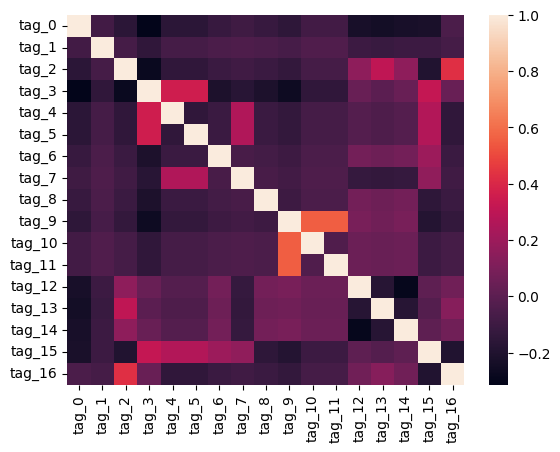

In [19]:
sns.heatmap(features.set_index('feature').corr())

<Axes: ylabel='Frequency'>

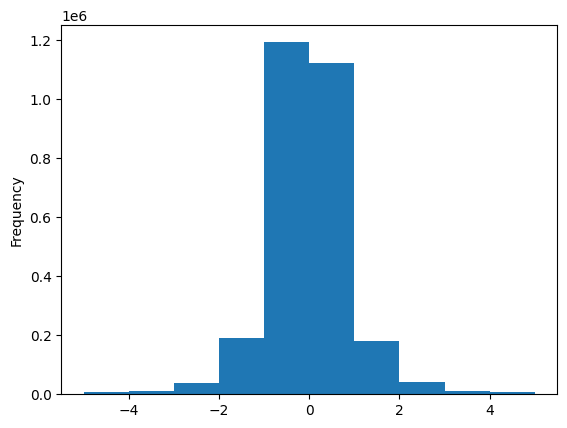

In [24]:
train_feat['responder_6'].plot(kind='hist')

In [29]:
train_feat.isnull().mean()

date_id        0.000000
time_id        0.000000
symbol_id      0.000000
weight         0.000000
feature_00     0.441417
                 ...   
responder_4    0.000000
responder_5    0.000000
responder_6    0.000000
responder_7    0.000000
responder_8    0.000000
Length: 92, dtype: float64

<Axes: >

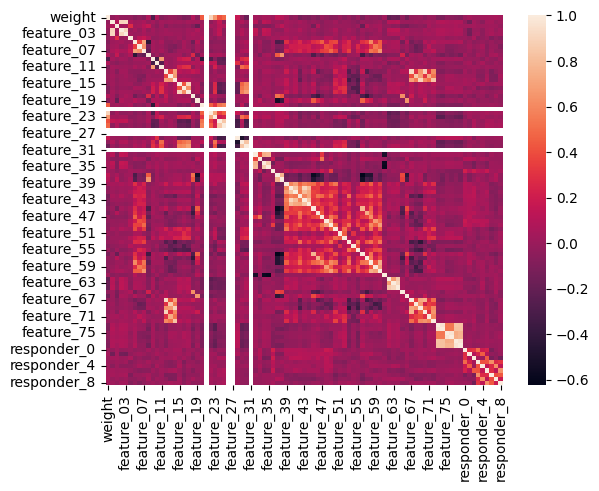

In [37]:
sns.heatmap(train_feat.sample(1000).iloc[:, 3:].corr())

<Axes: >

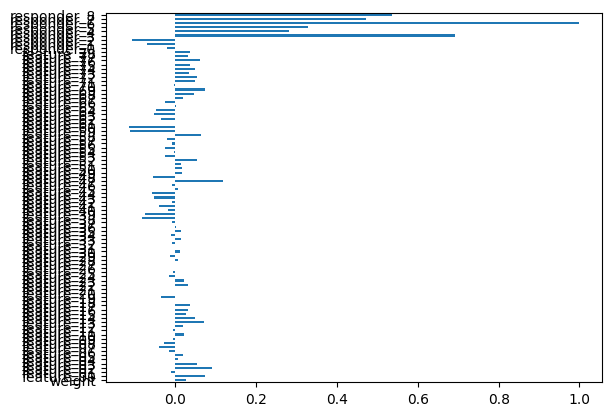

In [40]:
train_feat.sample(1000).iloc[:, 3:].corr().responder_6.plot(kind='barh')

In [ ]:
金融匿名的量化比赛：对数据集的理解 & 新的特征的挖掘（构造得到新的特征、验证特征重要性）

机器成本：cpu & gpu
    - 一类模型：决策树模型（xgboost、catboost、lightgbm）
    - 二类模型：深度学习模型（全连接网络、自编码）

数据挖掘（data mining）：加入特征、筛选特征、训练模型 & 对比精度
